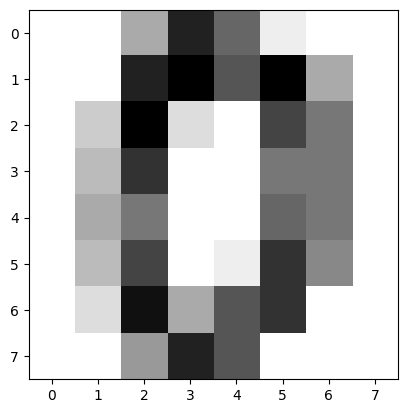

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

digits = datasets.load_digits()

plt.imshow(digits.images[0], cmap = plt.cm.gray_r, interpolation = 'nearest')

In [37]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [38]:
X = digits.data
y = digits.target

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [40]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [52]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1437, 64]),
 torch.Size([360, 64]),
 torch.Size([1437]),
 torch.Size([360]))

In [54]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [55]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(64, 64)     # 입력 64 → 64
        self.fc2 = nn.Linear(64, 32)     # 64 → 32
        self.fc3 = nn.Linear(32, 10)     # 32 → 10 (클래스 수)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # CrossEntropyLoss 사용 시 softmax는 생략
        return x


model = DNN()


In [56]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [57]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/30, Loss: 2.0053, Accuracy: 62.50%
Epoch 2/30, Loss: 1.1435, Accuracy: 77.22%
Epoch 3/30, Loss: 0.5469, Accuracy: 88.89%
Epoch 4/30, Loss: 0.3015, Accuracy: 94.44%
Epoch 5/30, Loss: 0.1961, Accuracy: 95.28%
Epoch 6/30, Loss: 0.1378, Accuracy: 96.11%
Epoch 7/30, Loss: 0.1022, Accuracy: 95.83%
Epoch 8/30, Loss: 0.0801, Accuracy: 96.94%
Epoch 9/30, Loss: 0.0642, Accuracy: 96.11%
Epoch 10/30, Loss: 0.0519, Accuracy: 95.56%
Epoch 11/30, Loss: 0.0432, Accuracy: 96.11%
Epoch 12/30, Loss: 0.0360, Accuracy: 96.11%
Epoch 13/30, Loss: 0.0302, Accuracy: 96.67%
Epoch 14/30, Loss: 0.0256, Accuracy: 96.67%
Epoch 15/30, Loss: 0.0217, Accuracy: 95.83%
Epoch 16/30, Loss: 0.0186, Accuracy: 96.39%
Epoch 17/30, Loss: 0.0165, Accuracy: 96.67%
Epoch 18/30, Loss: 0.0140, Accuracy: 96.11%
Epoch 19/30, Loss: 0.0121, Accuracy: 96.67%
Epoch 20/30, Loss: 0.0105, Accuracy: 96.94%
Epoch 21/30, Loss: 0.0092, Accuracy: 96.39%
Epoch 22/30, Loss: 0.0082, Accuracy: 96.39%
Epoch 23/30, Loss: 0.0072, Accuracy: 96.3

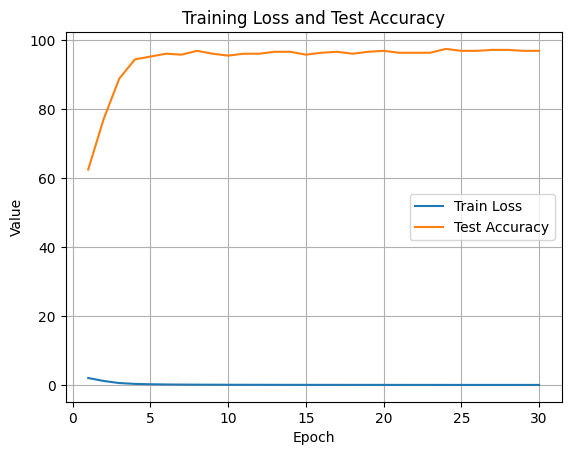

In [59]:
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Test Accuracy')
plt.legend()
plt.grid()
plt.show()

In [69]:
# Evaluation
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())


In [70]:
# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)


In [71]:
# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')


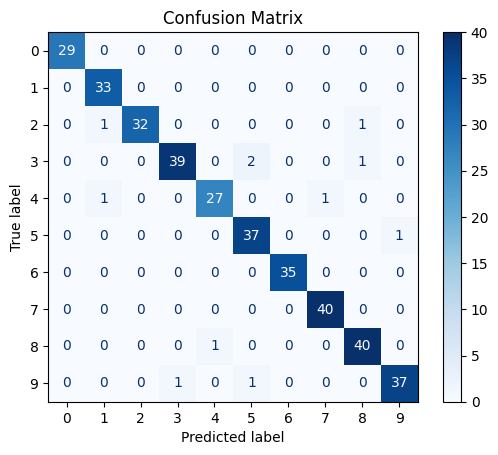

F1 Score: 0.97
Precision: 0.97
Recall: 0.97
Specificity: 1.00


In [72]:
# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))


ConfusionMatrixDisplay.from_predictions(
    all_labels, all_predictions, cmap=plt.cm.Blues, display_labels=range(10)
)
plt.title("Confusion Matrix")
plt.show()
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

In [73]:
from sklearn.metrics import classification_report
print("\nClassification Report:\n")
print(classification_report(all_labels, all_predictions))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.94      1.00      0.97        33
           2       1.00      0.94      0.97        34
           3       0.97      0.93      0.95        42
           4       0.96      0.93      0.95        29
           5       0.93      0.97      0.95        38
           6       1.00      1.00      1.00        35
           7       0.98      1.00      0.99        40
           8       0.95      0.98      0.96        41
           9       0.97      0.95      0.96        39

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



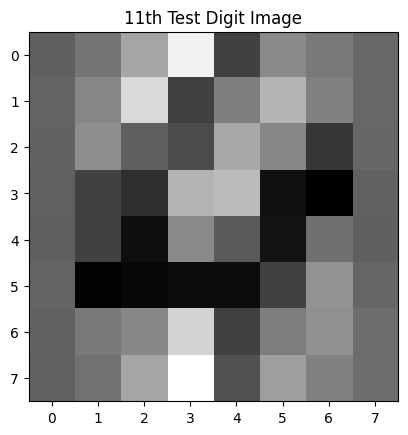

In [78]:
plt.imshow(X_test[8].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("11th Test Digit Image")
plt.show()

In [79]:
model.eval()
with torch.no_grad():
    single_input = X_test[8].unsqueeze(0)
    output = model(single_input)
    _, predicted = torch.max(output.data, 1)
    print(f"Prediction for the 8th Test Image: {predicted.item()}")

Prediction for the 8th Test Image: 4
